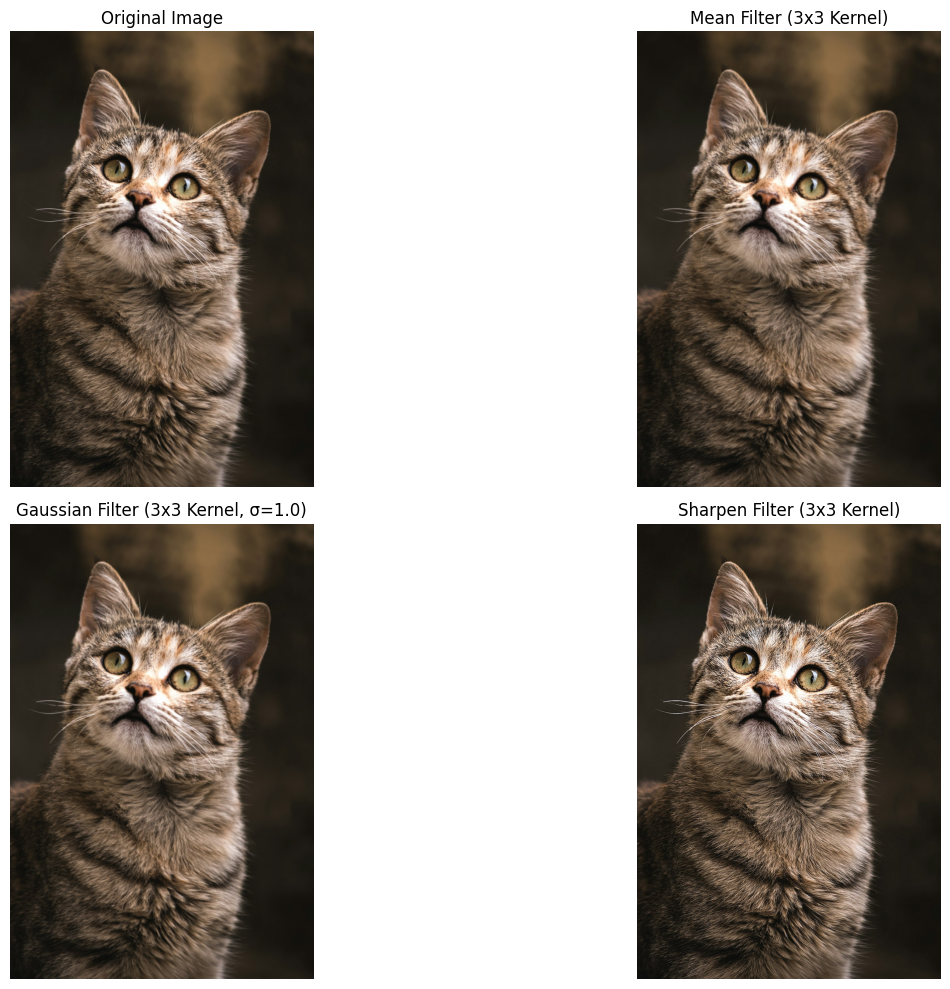

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path):
    """Load an image and convert it to RGB format (OpenCV reads images in BGR by default)"""
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not read the image: {image_path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display with matplotlib


def mean_filter(image, kernel_size=3):
    """
    Mean Filter (Box Filter)
    :param image: Input image (RGB format)
    :param kernel_size: Size of the kernel (must be odd, e.g., 3, 5, 7)
    :return: Filtered image
    """
    # Method 1: Use OpenCV's built-in function (recommended for efficiency)
    mean_blur = cv2.blur(image, (kernel_size, kernel_size))
    
    # Method 2: Custom uniform kernel + convolution (same effect as Method 1, for understanding)
    # kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size **2)  # Uniform kernel, normalized
    # mean_blur = cv2.filter2D(image, -1, kernel)  # -1 means output depth matches input
    
    return mean_blur


def gaussian_filter(image, kernel_size=3, sigma=1.0):
    """
    Gaussian Filter
    :param image: Input image (RGB format)
    :param kernel_size: Size of the kernel (must be odd, e.g., 3, 5, 7)
    :param sigma: Standard deviation of the Gaussian distribution, controlling blur strength
    :return: Filtered image
    """
    # Use OpenCV's built-in function, which automatically generates the Gaussian kernel and performs convolution
    gaussian_blur = cv2.GaussianBlur(
        image, 
        (kernel_size, kernel_size), 
        sigmaX=sigma,  # Standard deviation in X direction
        sigmaY=sigma   # Standard deviation in Y direction (can be omitted if equal to X)
    )
    return gaussian_blur


def sharpen_filter(image):
    """
    Linear Sharpen Filter (based on unsharp masking principle)
    :param image: Input image (RGB format)
    :return: Sharpened image
    """
    # Define a common 3x3 sharpening kernel (central weight is higher than surrounding to emphasize edges)
    # Kernel explanation: Central pixel weight = 5, adjacent pixels (up/down/left/right) = -1, corners = 0; sum = 1 (preserves brightness)
    sharpen_kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ], dtype=np.float32)
    
    # Apply the kernel via convolution
    sharpened = cv2.filter2D(image, -1, sharpen_kernel)
    return sharpened


def show_results(original, mean_blur, gaussian_blur, sharpened):
    """Display the original image and the three filtered results"""
    plt.figure(figsize=(16, 10))
    
    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")
    
    # Mean filter result
    plt.subplot(2, 2, 2)
    plt.imshow(mean_blur)
    plt.title("Mean Filter (3x3 Kernel)")
    plt.axis("off")
    
    # Gaussian filter result
    plt.subplot(2, 2, 3)
    plt.imshow(gaussian_blur)
    plt.title("Gaussian Filter (3x3 Kernel, σ=1.0)")
    plt.axis("off")
    
    # Sharpen filter result
    plt.subplot(2, 2, 4)
    plt.imshow(sharpened)
    plt.title("Sharpen Filter (3x3 Kernel)")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Replace with your image path (supports .jpg, .png, etc.)
    image_path = "photo.jpeg"  # e.g., "lena.png"
    
    try:
        # Load the image
        original = load_image(image_path)
        
        # Apply the three filters
        mean_blur = mean_filter(original, kernel_size=3)  # Mean filter with 3x3 kernel
        gaussian_blur = gaussian_filter(original, kernel_size=3, sigma=1.0)  # Gaussian filter
        sharpened = sharpen_filter(original)  # Sharpen filter
        
        # Display results
        show_results(original, mean_blur, gaussian_blur, sharpened)
        
    except Exception as e:
        print(f"Error during processing: {e}")